Hello, my name is Dmitry. 
I'm introducing to your attention my EDA (exploratory data analysis). 
In this notebook we will solve the next cases:
we will take 5 bussines accounts in social network "VK", united the bussines field - online-education,
trace the users activity such as: likes, views, reposts, comments. 
After that we'll compare efficiency of SMM deps of all five groups. 
At the end we'll make NLP preprocessing of post texts of all groups.
Let’s get started.

The preparation work is based on another script written by myself. It's .py module wich makes this things:
it tooks in dialog-mode txt-file with personal data (my own, or somebody else) to authorize in network,
next step it tooks in dialog-mode also txt-file with list of groups we need to analyze,
after it authorize, dowloads all post from walls of this groups and records data in csv-files named after groups names.
Now back to notebook.

In [76]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
from string import punctuation
from nltk.tokenize import word_tokenize

This function is cuting of out-of-limits values according 'three sigma rule' 

In [3]:
def df_sigma(df_series):
    dev = (df_series - df_series.mean()).abs()
    std = df_series.std()
    return df_series[~(dev>3*std)]

In [4]:
df_netology = pd.read_csv('netology.csv')
df_geekbrainsru = pd.read_csv('geekbrainsru.csv')
df_rustepik = pd.read_csv('rustepik.csv')
df_skillbox = pd.read_csv('skillbox.csv')
df_skillfactory = pd.read_csv('skillfactoryschool.csv')

Every dataframe we prepare before analytics with such embedded function of Pandas module as: info, describe, dtypes and msno to find the most informative columns and cut of all garbage. After we keep usefull columns and make the dataframe to work with.

First group to sheck is Skillbox. It's online-university with fee-based learning programs in IT-sphere

In [5]:
df_skillbox = df_skillbox[['date', 'text', 'comments.count', 'likes.count', 'reposts.count', 'views.count']]
df_skillbox.fillna(0)
df_skillbox['date'] = [datetime.utcfromtimestamp(i).strftime('%Y-%m-%d %H') for i in df_skillbox.date]
df_skillbox['date_time'] = pd.to_datetime(df_skillbox.date)
df_skillbox['date'] = pd.to_datetime(df_skillbox.date)
df_skillbox['date'] = df_skillbox['date'].dt.date
df_skillbox['date_time'] = df_skillbox['date_time'].dt.time
df_skillbox.set_index('date', inplace=True)
df_skillbox.head()

,text,comments.count,likes.count,reposts.count,views.count,date_time
date,,,,,,
2021-07-04,"Яна работала в таможне, мечтала стать актрисои...",0,15,9,10610.0,10:00:00
2021-07-03,На днях завершился главный международный фес...,0,11,4,12890.0,09:00:00
2021-07-02,Год назад Александр Воронин создал проект по д...,12,29,20,15305.0,17:00:00
2021-07-02,"Поговорили с Анной Стоговой, преподавателем ку...",10,16,10,13763.0,11:00:00
2021-07-01,Какие у вас планы на пенсию? \n \nНина Николае...,30,40,13,13065.0,15:00:00


We will use the scatter graphics because i believe that all user activites we observe are discret things

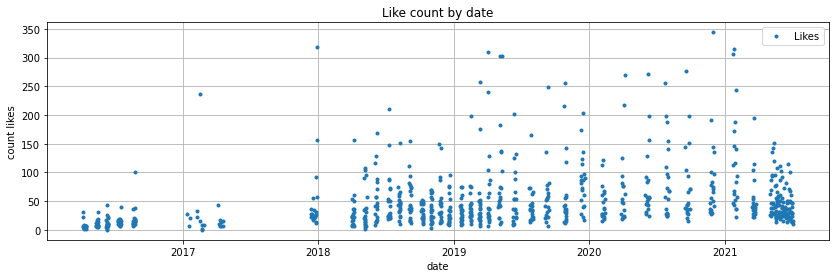

In [6]:
likes = df_sigma(df_series=df_skillbox['likes.count'])
plt.figure(figsize=(14,4))
plt.title('Like count by date')
plt.xlabel('date')
plt.ylabel('count likes')
plt.grid()
plt.plot(likes,'.', label='Likes') 
plt.legend()
plt.show()

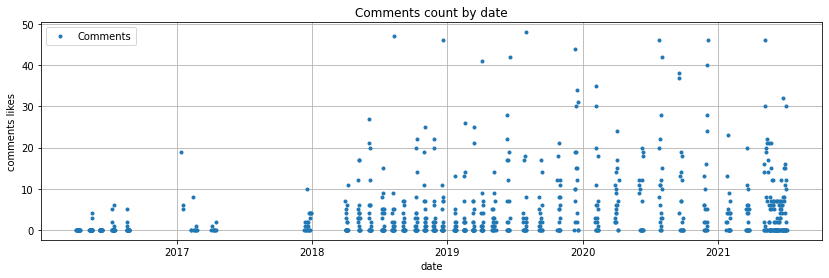

In [7]:
comments = df_sigma(df_series=df_skillbox['comments.count'])
plt.figure(figsize=(14,4),)
plt.title('Comments count by date')
plt.xlabel('date')
plt.ylabel('comments likes')
plt.grid()
plt.plot(comments,'.', label='Comments') 
plt.legend()
plt.show()

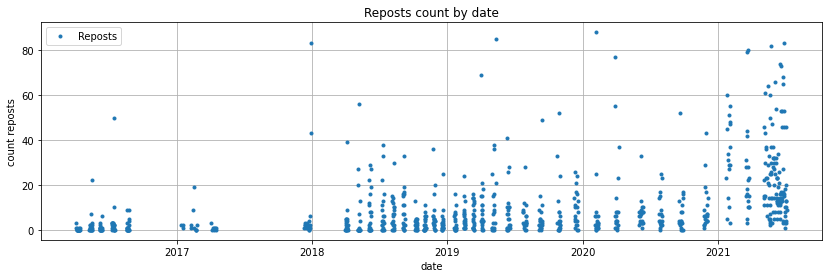

In [8]:
reposts = df_sigma(df_series=df_skillbox['reposts.count'])

plt.figure(figsize=(14,4),)
plt.title('Reposts count by date')
plt.xlabel('date')
plt.ylabel('count reposts')
plt.grid()
plt.plot(reposts,'.', label='Reposts') 
plt.legend()
plt.show()

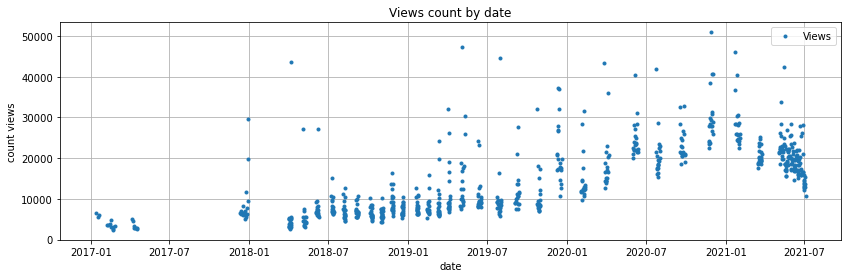

In [9]:
views = df_sigma(df_series=df_skillbox['views.count'])

plt.figure(figsize=(14,4),)
plt.title('Views count by date')
plt.xlabel('date')
plt.ylabel('count views')
plt.grid()
plt.plot(views,'.', label='Views') 
plt.legend()
plt.show()

We can see increasing skillbox group activity in all timeline, especial prominently in period of pandemic.
Number of post, counts of likes and and user activity increasing all the time, but there is one interesting moment: the number of views is started to decreasing since spring of 2021. 
Note this fact and let's other groups statistics

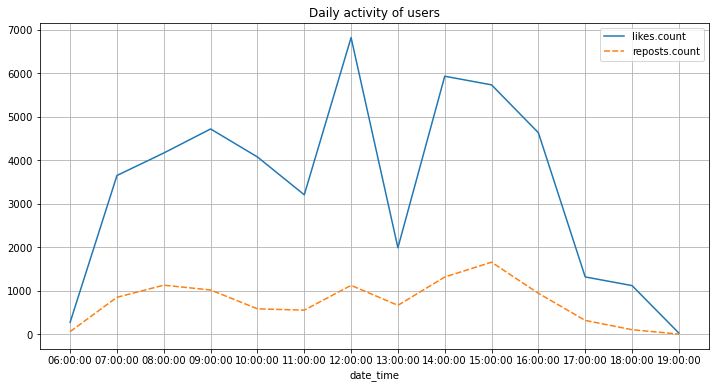

In [36]:
df_skillbox.date_time = df_skillbox.date_time.astype(str)
label = list(df_skillbox.groupby('date_time').sum().columns)
data = df_skillbox.groupby('date_time').sum()[['likes.count', 'reposts.count']]

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=data, ax=ax)
plt.title('Daily activity of users')
plt.grid()
plt.show()

As for daily activity, there are three peaks of it - breakfest 7:00 till 10:00 am, lunch with highly explicit level starting at 12:00, and afternoon activity which starts at 14:00 and almost ends to 17:00.
There is almost 100% correlation between line graphs of likes and reposts.
In my oppinion this is abvious strategy to make post in this intervals becoause of specifics of our groups: people use social networks at work breaks and looking for increasing of their working skills and so on.

Our second group to sheck is Netology. Just Skillbox they online-education course in same way and same sphere

In [11]:
 df_netology = df_netology[['date', 'text', 'comments.count', 'likes.count', 'reposts.count', 'views.count']]
df_netology.fillna(0)
df_netology['date'] = [datetime.utcfromtimestamp(i).strftime('%Y-%m-%d %H') for i in df_netology.date]
df_netology['date_time'] = pd.to_datetime(df_netology.date)
df_netology['date_time'] = df_netology['date_time'].dt.time
df_netology['date'] = pd.to_datetime(df_netology.date)
df_netology['date'] = df_netology['date'].dt.date
df_netology.set_index('date', inplace=True)
df_netology.head()

,text,comments.count,likes.count,reposts.count,views.count,date_time
date,,,,,,
2021-07-02,"Шашлыков мало не бывает: выбирайте, что лучше ...",6,5,0,3570.0,14:00:00
2021-07-05,12 июля стартует курс «Python-разработка для н...,0,3,1,794.0,07:00:00
2021-07-04,Ежедневно нам приходится выполнять множество с...,0,32,26,3514.0,08:00:00
2021-07-03,Сейчас на hh.ru почти 16 тысяч предложений по ...,0,9,6,2317.0,07:00:00
2021-07-02,"Собрали подборку бесплатных курсов и занятий, ...",0,14,26,87988.0,07:00:00


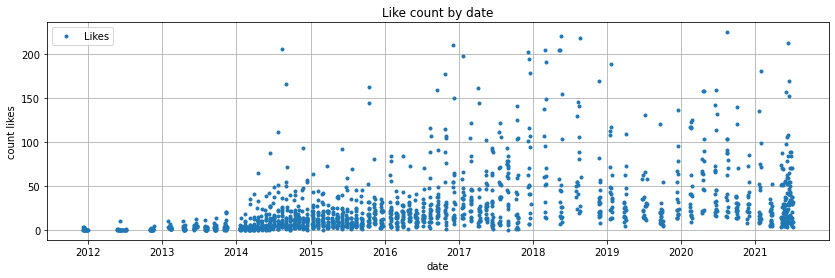

In [12]:
likes = df_sigma(df_series=df_netology['likes.count'])

plt.figure(figsize=(14,4))
plt.title('Like count by date')
plt.xlabel('date')
plt.ylabel('count likes')
plt.grid()
plt.plot(likes,'.', label='Likes') 
plt.legend()
plt.show()

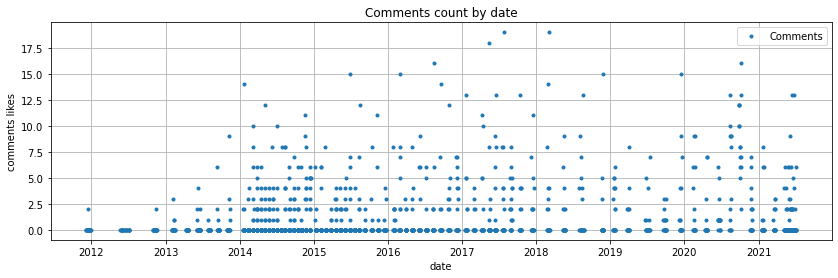

In [13]:
df_netology = df_netology[df_netology['comments.count'] < 100]
comments = df_sigma(df_series=df_netology['comments.count'])
plt.figure(figsize=(14,4),)
plt.title('Comments count by date')
plt.xlabel('date')
plt.ylabel('comments likes')
plt.grid()
plt.plot(comments,'.', label='Comments') 
plt.legend()
plt.show()

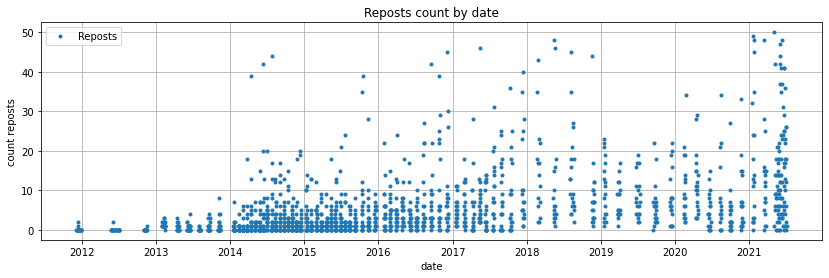

In [14]:
reposts = df_sigma(df_series=df_netology['reposts.count'])

plt.figure(figsize=(14,4),)
plt.title('Reposts count by date')
plt.xlabel('date')
plt.ylabel('count reposts')
plt.grid()
plt.plot(reposts,'.', label='Reposts') 
plt.legend()
plt.show()

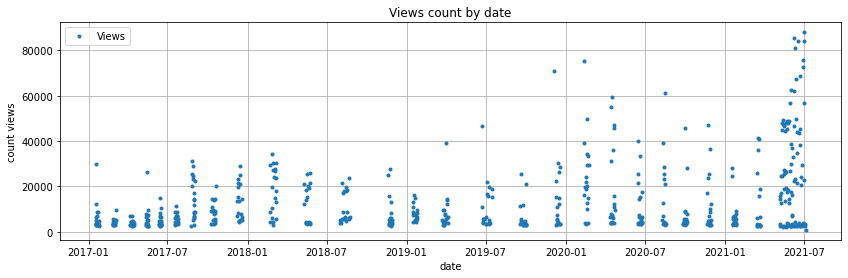

In [15]:
views = df_sigma(df_series=df_netology['views.count'])

plt.figure(figsize=(14,4),)
plt.title('Views count by date')
plt.xlabel('date')
plt.ylabel('count views')
plt.grid()
plt.plot(views,'.', label='Views') 
plt.legend()
plt.show()

In graphs belonging Netology groups we can see not homogeneous density in timeline. This group is older Skillbox, it seems like 'it's times past'. There are less count of likes and reposts, but thanks to its age it has more members and as consequence more views wihout any decreasing. 
As my opinion they are trying to get in 'trends' now.

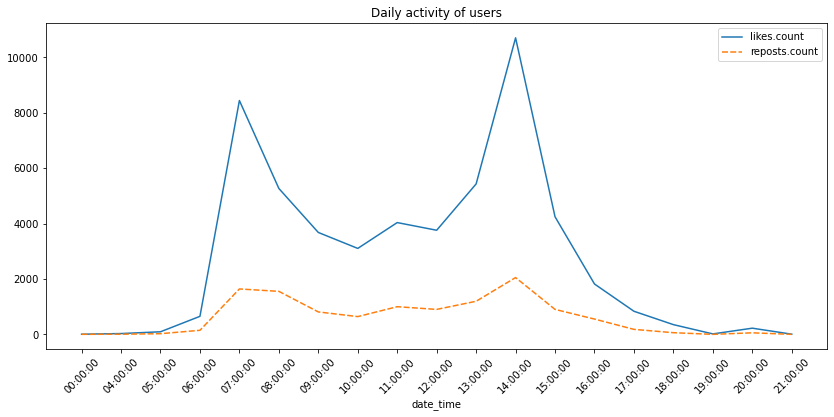

In [16]:
df_netology.date_time = df_netology.date_time.astype(str)
label = list(df_netology.groupby('date_time').sum().columns)
data = df_netology.groupby('date_time').sum()[['likes.count', 'reposts.count']]

fig, ax = plt.subplots(figsize=(14,6))
sns.lineplot(data=data, ax=ax)
plt.title('Daily activity of users')
plt.xticks(rotation=45)
plt.show()

Unlike from Skillbox daily activity graph in Netology grouo we see only two peaks of activity: in 7:00 and 14:00/
In all other groups by the way, it will appeare almost identical sityation: two peaks.
I belive that the strategy chosen by Skillbox more efficient, but we'll see.

The third one is Geekbrains group. They do the same things like the other two.
But in my opinion they do it more 'agressive' and use more market tricks. For example they use words 'faculty' instead of 'online-courses'. 
Let see our graphs to find out something interesting.

In [18]:
df_geekbrainsru = df_geekbrainsru[['date', 'text', 'comments.count', 'likes.count', 'reposts.count', 'views.count']]
df_geekbrainsru.fillna(0)
df_geekbrainsru['date'] = [datetime.utcfromtimestamp(i).strftime('%Y-%m-%d %H') for i in df_geekbrainsru.date]
df_geekbrainsru['date_time'] = pd.to_datetime(df_geekbrainsru.date)
df_geekbrainsru['date_time'] = df_geekbrainsru['date_time'].dt.time
df_geekbrainsru['date'] = pd.to_datetime(df_geekbrainsru.date)
df_geekbrainsru['date'] = df_geekbrainsru['date'].dt.date
df_geekbrainsru.set_index('date', inplace=True)
df_geekbrainsru.head()

,text,comments.count,likes.count,reposts.count,views.count,date_time
date,,,,,,
2021-06-26,Сегодня Kubernetes внедряют даже самые консерв...,1,15,7,12081.0,09:00:00
2021-07-04,Есть распространённый миф — будто знания и опы...,0,5,3,6851.0,08:00:00
2021-07-03,NaN,4,250,79,22264.0,09:00:00
2021-07-02,Их главные герои спасают мир и вершат судьбы с...,2,70,80,16001.0,12:00:00
2021-06-30,"Если вы вдруг вернетесь в 2007-й, то сможете з...",16,70,24,32535.0,15:00:00


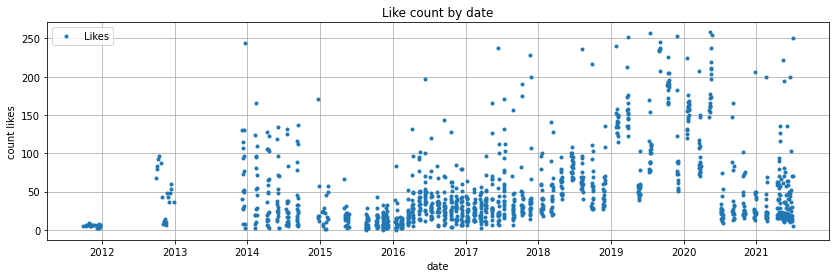

In [38]:
df_geekbrainsru = df_geekbrainsru[df_geekbrainsru['likes.count'] < 400]
likes = df_sigma(df_series=df_geekbrainsru['likes.count'])

plt.figure(figsize=(14,4))
plt.title('Like count by date')
plt.xlabel('date')
plt.ylabel('count likes')
plt.grid()
plt.plot(likes,'.', label='Likes') 
plt.legend()
plt.show()

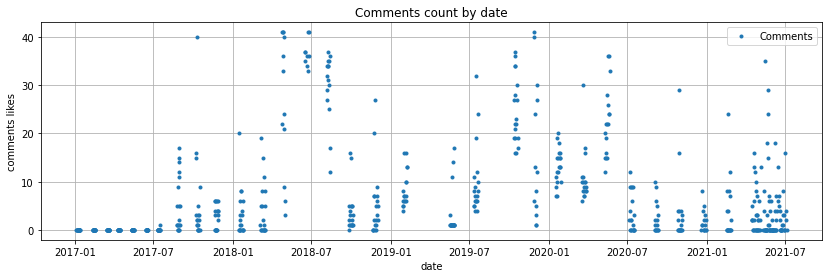

In [43]:
df_geekbrainsru = df_geekbrainsru[df_geekbrainsru['comments.count'] < 400]
comments = df_sigma(df_series=df_geekbrainsru['comments.count'])

plt.figure(figsize=(14,4),)
plt.title('Comments count by date')
plt.xlabel('date')
plt.ylabel('comments likes')
plt.grid()
plt.plot(comments,'.', label='Comments') 
plt.legend()
plt.show()

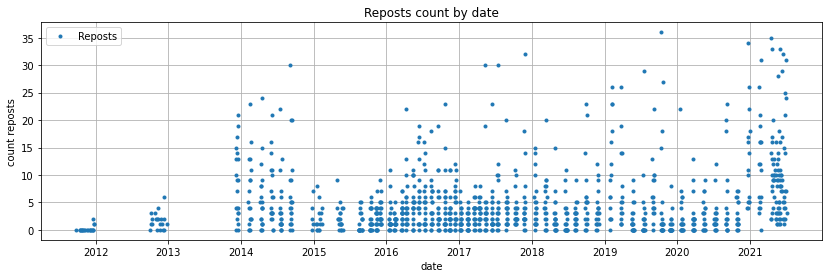

In [40]:
df_geekbrainsru = df_geekbrainsru[df_geekbrainsru['reposts.count'] < 100]
reposts = df_sigma(df_series=df_geekbrainsru['reposts.count'])

plt.figure(figsize=(14,4),)
plt.title('Reposts count by date')
plt.xlabel('date')
plt.ylabel('count reposts')
plt.grid()
plt.plot(reposts,'.', label='Reposts') 
plt.legend()
plt.show()

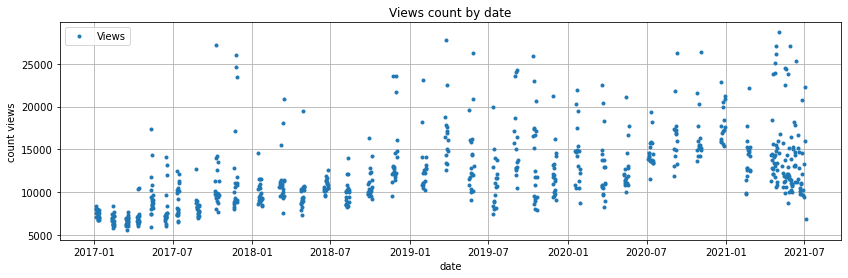

In [41]:
df_geekbrainsru = df_geekbrainsru[df_geekbrainsru['views.count'] < 50000]
views = df_sigma(df_series=df_geekbrainsru['views.count'])

plt.figure(figsize=(14,4),)
plt.title('Views count by date')
plt.xlabel('date')
plt.ylabel('count views')
plt.grid()
plt.plot(views,'.', label='Views') 
plt.legend()
plt.show()

As you can see i had to use additional parameters like limitations of counts before i use sigma-function. It hapend because in other wise we will see plently dots on graphs that symbolize thousands comment, reposts and likes. And i have doubts about this. 
Ofcourse density in this graphs tells us that they (i mean Geekbrains) have the core of active users.
But here is one thing: please pay your attention that public interests (views) are decreasing in third group we watching. Let's have a look further

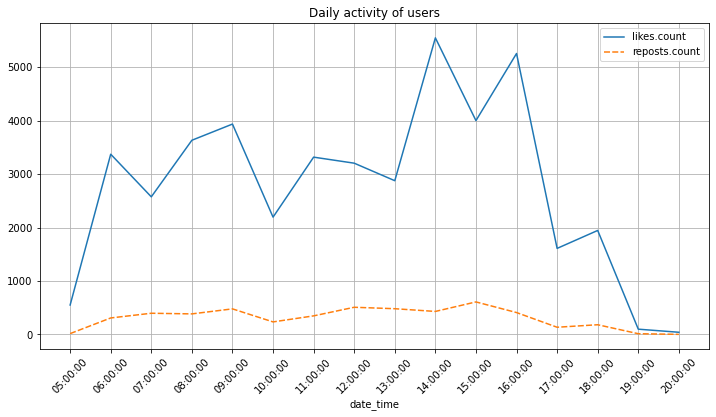

In [44]:
df_geekbrainsru.date_time = df_geekbrainsru.date_time.astype(str)
label = list(df_geekbrainsru.groupby('date_time').sum().columns)
data = df_geekbrainsru.groupby('date_time').sum()[['likes.count', 'reposts.count']]

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=data, ax=ax)
plt.title('Daily activity of users')
plt.xticks(rotation=45)
plt.grid()
plt.show()

As alredy said graphs of daily activity are almost equal in all groups except Skillbox. There are little differencies in time 8:00 instead of 7:00 thats all.

Now our forth one. Stepik. Online school in IT.
I decided to include this in EDA becouse it's like a 'little fish in a pool with sharks of bussines'. Becouse the most part of it's materials are free. And they are high quality. That means they don't need to invest in social ads like others, and lets see what it goes in graphs.

In [24]:
df_rustepik = df_rustepik[['date', 'text', 'comments.count', 'likes.count', 'reposts.count', 'views.count']]
df_rustepik.fillna(0)
df_rustepik['date'] = [datetime.utcfromtimestamp(i).strftime('%Y-%m-%d %H') for i in df_rustepik.date]
df_rustepik['date_time'] = pd.to_datetime(df_rustepik.date)
df_rustepik['date_time'] = df_rustepik['date_time'].dt.time
df_rustepik['date'] = pd.to_datetime(df_rustepik.date)
df_rustepik['date'] = df_rustepik['date'].dt.date
df_rustepik.set_index('date', inplace=True)
df_rustepik.head()

,text,comments.count,likes.count,reposts.count,views.count,date_time
date,,,,,,
2021-06-25,"Нам часто пишут, что хотят попасть в команду S...",1,29,33,7719.0,07:00:00
2021-07-05,Если вы только начинаете изучать программирова...,2,21,25,2382.0,07:00:00
2021-07-02,Набор «Интеллект и развитие»\n\nПубликуем подб...,0,39,69,5636.0,07:00:00
2021-06-30,Пост с вакансиями! \nСегодня передаём микрофон...,3,33,27,6604.0,07:00:00
2021-06-28,Недавно попросили в комментариях сделать ещё п...,21,175,244,12575.0,07:00:00


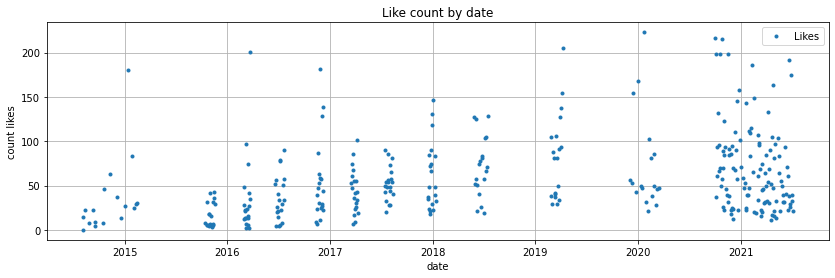

In [25]:
likes = df_sigma(df_series=df_rustepik['likes.count'])

plt.figure(figsize=(14,4))
plt.title('Like count by date')
plt.xlabel('date')
plt.ylabel('count likes')
plt.grid()
plt.plot(likes,'.', label='Likes') 
plt.legend()
plt.show()

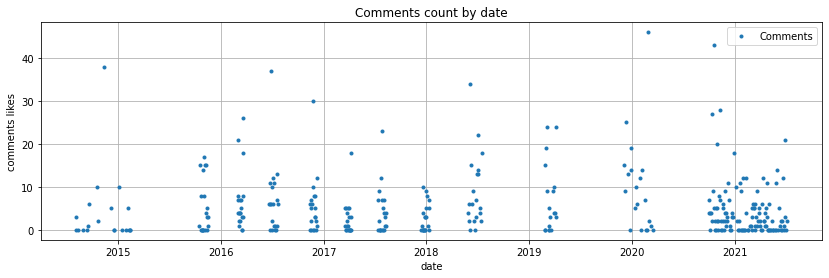

In [26]:
comments = df_sigma(df_series=df_rustepik['comments.count'])

plt.figure(figsize=(14,4),)
plt.title('Comments count by date')
plt.xlabel('date')
plt.ylabel('comments likes')
plt.grid()
plt.plot(comments,'.', label='Comments') 
plt.legend()
plt.show()

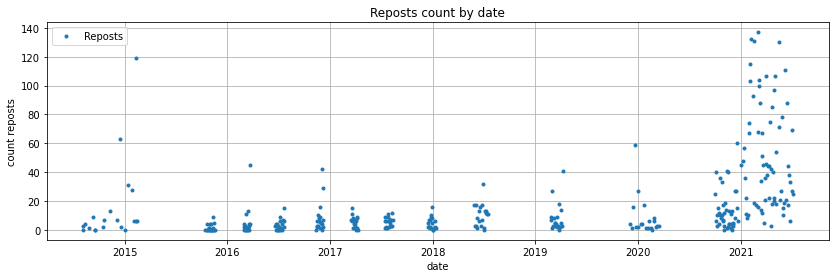

In [27]:
reposts = df_sigma(df_series=df_rustepik['reposts.count'])

plt.figure(figsize=(14,4),)
plt.title('Reposts count by date')
plt.xlabel('date')
plt.ylabel('count reposts')
plt.grid()
plt.plot(reposts,'.', label='Reposts') 
plt.legend()
plt.show()

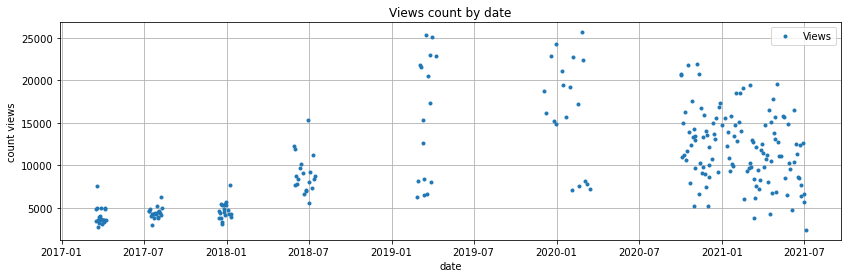

In [28]:
views = df_sigma(df_series=df_rustepik['views.count'])

plt.figure(figsize=(14,4),)
plt.title('Views count by date')
plt.xlabel('date')
plt.ylabel('count views')
plt.grid()
plt.plot(views,'.', label='Views') 
plt.legend()
plt.show()

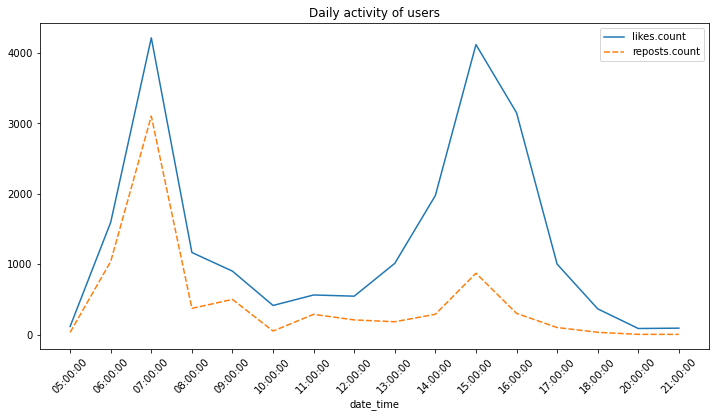

In [29]:
df_rustepik.date_time = df_rustepik.date_time.astype(str)
label = list(df_rustepik.groupby('date_time').sum().columns)
data = df_rustepik.groupby('date_time').sum()[['likes.count', 'reposts.count']]

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=data, ax=ax)
plt.title('Daily activity of users')
plt.xticks(rotation=45)
plt.show()

I can't say anythig new about daily activity, it's all the same. People gets up, drink cofee, explore social networks, after noon they do the same. That's all. Post at this time and 'be the views with you'.

And again. There was a pandemic year of 2020 and many of us made a various life choises about there jobs, careers. And we saw the peaks of activity of interests in IT education at graphs in this EDA. 
But in graphs of Stepik group we see how it was without market advertising, tricks. 
We can observe peoples interests to learn something new without any life pressures.

And the last one. Skillfactory. I think they do something wrong. They have unimpressive design of site, unimpressive learning programm, very impressive prices and as result not mush activity of users in there social group. We'll see low rates of post, no comments and rare posting.

In [30]:
df_skillfactory = df_skillfactory[['date', 'text', 'comments.count', 'likes.count', 'reposts.count', 'views.count']]
df_skillfactory.fillna(0)
df_skillfactory['date'] = [datetime.utcfromtimestamp(i).strftime('%Y-%m-%d %H') for i in df_skillfactory.date]
df_skillfactory['date_time'] = pd.to_datetime(df_skillfactory.date)
df_skillfactory['date'] = pd.to_datetime(df_skillfactory.date)
df_skillfactory['date'] = df_skillfactory['date'].dt.date
df_skillfactory['date_time'] = df_skillfactory['date_time'].dt.time
df_skillfactory.set_index('date', inplace=True)
df_skillfactory.head()

,text,comments.count,likes.count,reposts.count,views.count,date_time
date,,,,,,
2021-07-04,"Это статья для тех, кто уже пробует кодить на ...",0,8,11,570,17:00:00
2021-07-02,Рискнете отличить реальные взломы от историй и...,0,2,3,581,16:00:00
2021-06-29,Еще один выпуск нашего подкаста прибыл! \n\nГо...,0,1,0,499,14:00:00
2021-06-28,#СоветыВыпускников\n\nРождение дочери сподвигл...,0,6,6,926,16:00:00
2021-06-27,На недавней встрече GetMentor со SkillFactory ...,0,1,2,779,14:00:00


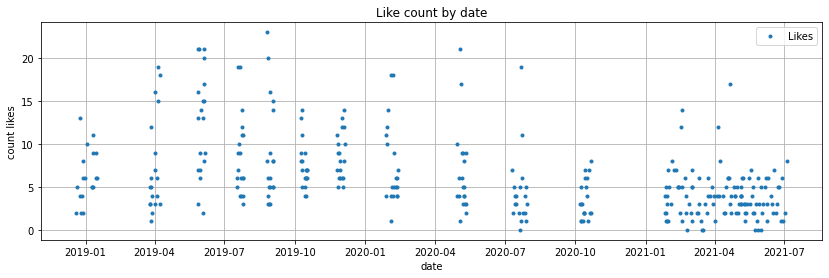

In [31]:
likes = df_sigma(df_series=df_skillfactory['likes.count'])

plt.figure(figsize=(14,4))
plt.title('Like count by date')
plt.xlabel('date')
plt.ylabel('count likes')
plt.grid()
plt.plot(likes,'.', label='Likes') 
plt.legend()
plt.show()

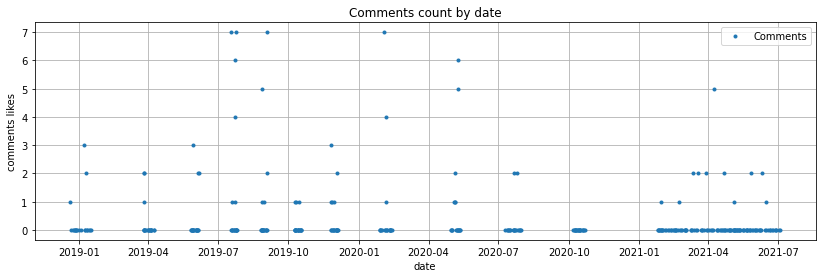

In [32]:
comments = df_sigma(df_series=df_skillfactory['comments.count'])

plt.figure(figsize=(14,4),)
plt.title('Comments count by date')
plt.xlabel('date')
plt.ylabel('comments likes')
plt.grid()
plt.plot(comments,'.', label='Comments') 
plt.legend()
plt.show()

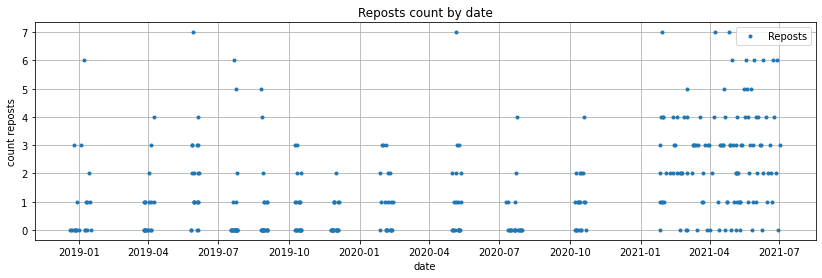

In [33]:
reposts = df_sigma(df_series=df_skillfactory['reposts.count'])

plt.figure(figsize=(14,4),)
plt.title('Reposts count by date')
plt.xlabel('date')
plt.ylabel('count reposts')
plt.grid()
plt.plot(reposts,'.', label='Reposts') 
plt.legend()
plt.show()

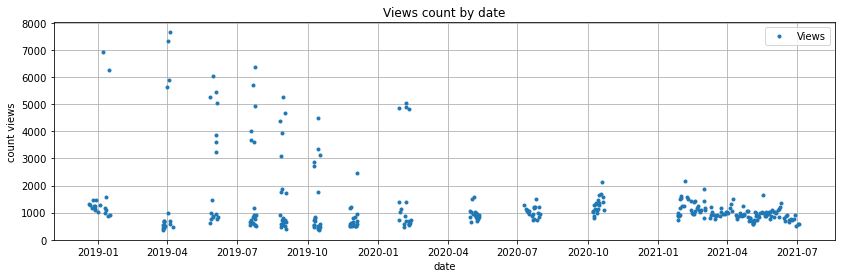

In [34]:
views = df_sigma(df_series=df_skillfactory['views.count'])

plt.figure(figsize=(14,4),)
plt.title('Views count by date')
plt.xlabel('date')
plt.ylabel('count views')
plt.grid()
plt.plot(views,'.', label='Views') 
plt.legend()
plt.show()

So even this group statistics shows us decreasing of interest to online learning at all. I see many reasons of it. It might be market saturation, ending of pandemic tendentions and rebirthing of economics and etc. Or may be just sudents have run out. That means greater competition in markets of learning which demands more quality in post. That why the next part of EDA will be Text Preprocessing of our posts in dataframes.

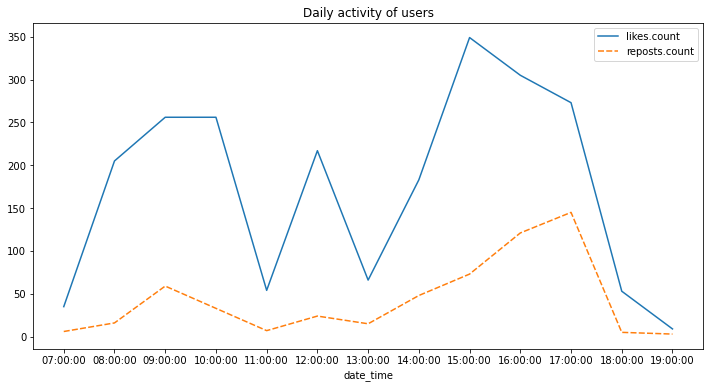

In [35]:
df_skillfactory.date_time = df_skillfactory.date_time.astype(str)
label = list(df_skillfactory.groupby('date_time').sum().columns)
data = df_skillfactory.groupby('date_time').sum()[['likes.count', 'reposts.count']]

fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=data, ax=ax)
plt.title('Daily activity of users')
plt.show()

Have you saw Batman's ears? I see it.

A few words about text preprocessing. 
This function makes all words is lower case and uses regular expressions to purge from text all 
garbage like html tags, punctuation, line breaks and etc

In [81]:
def purge_case(data):
    data['text'] = [str(i).lower() for i in data.text]
    html_re = r'<.*?>'
    data['text'] = [re.sub(pattern=html_re, repl=' ', string=i) for i in data.text]
    url_re = r'https?://\S+|www\.\S+'
    data['text'] = [re.sub(pattern=url_re, repl=' ', string=i) for i in data.text]
    sharp_re = r'#'
    data['text'] = [re.sub(pattern=sharp_re, repl=' ', string=i) for i in data.text]
    garb_re = r'\n'
    data['text'] = [re.sub(pattern=garb_re, repl=' ', string=i) for i in data.text]
    data['text'] = [i.translate(str.maketrans('', '', punctuation)) for i in data.text]
    return data


This function makes from text separate words in list

In [80]:
def word_tok(data):
    data['text'] = [nltk.word_tokenize(i) for i in data.text]
    return data
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/dmitry/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [85]:
purge_case(data=df_skillbox)
word_tok(data=df_skillbox)
purge_case(data=df_netology)
word_tok(data=df_netology)
purge_case(data=df_skillfactory)
word_tok(data=df_skillfactory)
purge_case(data=df_rustepik)
word_tok(data=df_rustepik)
purge_case(data=df_geekbrainsru)
word_tok(data=df_geekbrainsru)

,text,comments.count,likes.count,reposts.count,views.count,date_time
date,,,,,,
2021-06-26,"[сегодня, kubernetes, внедряют, даже, самые, к...",1,15,7,12081.0,09:00:00
2021-07-04,"[есть, распространённый, миф, —, будто, знания...",0,5,3,6851.0,08:00:00
2021-07-03,[nan],4,250,79,22264.0,09:00:00
2021-07-02,"[их, главные, герои, спасают, мир, и, вершат, ...",2,70,80,16001.0,12:00:00
2021-06-30,"[если, вы, вдруг, вернетесь, в, 2007й, то, смо...",16,70,24,32535.0,15:00:00
...,...,...,...,...,...,...
2017-01-06,"[geekjob, интересные, вакансии, компании, agim...",0,14,0,7546.0,17:00:00
2017-01-06,"[geekweek, запись, истории, успеха, евгения, л...",0,11,0,8011.0,07:00:00
2017-01-06,"[geekcourse, бесплатный, курс, «, php, личный,...",0,64,7,8006.0,06:00:00


thats all, thanks